Agriculture Cyber Phisycal System

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/crop_data.csv")
df.head()

C:\Users\nkolh\AppData\Local\Temp\ipykernel_21332\2111088149.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [2]:
sample_df = df.sample(10)

sample_df.to_csv('sample.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [7]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=21)

print(X_train)
print(y_train)

        N    P    K  temperature   humidity        ph    rainfall
403    27   57   24    27.335349  43.357960  6.091863  142.330368
698    23   45   23    28.776535  86.691340  6.983130   56.124432
2044   94   37   41    24.763452  87.060711  6.463539  179.163086
821    13   61   24    18.297836  69.689762  7.629910   49.391115
1936  113   38   25    22.000851  79.472710  7.388266   90.422242
...   ...  ...  ...          ...        ...       ...         ...
1144   31   29   26    28.223734  47.405191  5.024125   97.768323
48     79   43   39    21.666283  80.709606  7.062779  210.814209
772    21   80   20    28.206673  68.270852  7.350870   64.328871
1848   29   17   29    29.203949  95.669973  5.959493  211.250627
1231    7  126  203    16.762017  82.003356  5.662140   73.287128

[1540 rows x 7 columns]
403     pigeonpeas
698       mungbean
2044          jute
821         lentil
1936        cotton
           ...    
1144         mango
48            rice
772      blackgram
1848       c

In [9]:
plt.figure(figsize=(10,8),dpi=96)
sns.heatmap(data=df.corr(),annot=True)
plt.show()

ValueError: could not convert string to float: 'rice'

<Figure size 960x768 with 0 Axes>

In [10]:
acc = []
model = []

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  86.81818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       0.97      1.00      0.98        32
   blackgram       0.62      0.97      0.76        32
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        28
      coffee       0.97      1.00      0.99        37
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       0.65      0.91      0.76        34
 kidneybeans       0.00      0.00      0.00        29
      lentil       0.59      1.00      0.74        33
       maize       0.96      1.00      0.98        25
       mango       1.00      1.00      1.00        28
   mothbeans       0.00      0.00      0.00        36
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        29
      orange       1.00      1.00

In [12]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [13]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [14]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        32
   blackgram       1.00      1.00      1.00        32
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        28
      coffee       1.00      1.00      1.00        37
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       0.92      1.00      0.96        34
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        33
       maize       1.00      1.00      1.00        25
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      1.00      1.00        36
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        29
      orange       1.00      1.00 

In [15]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [16]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
# transform testing dataabs
X_test_norm = norm.transform(X_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,y_train)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.9863636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        32
   blackgram       0.97      0.97      0.97        32
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        28
      coffee       1.00      1.00      1.00        37
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       0.91      0.91      0.91        34
 kidneybeans       1.00      1.00      1.00        29
      lentil       0.94      0.97      0.96        33
       maize       1.00      1.00      1.00        25
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.97      0.99        36
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        29
      orange       1.00      1.00      1.0

In [17]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

In [18]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,y_train)

predicted_values = LogReg.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.9575757575757575
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        32
   blackgram       0.85      0.91      0.88        32
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        28
      coffee       0.95      1.00      0.97        37
      cotton       0.93      0.93      0.93        28
      grapes       1.00      1.00      1.00        33
        jute       0.88      0.85      0.87        34
 kidneybeans       0.97      1.00      0.98        29
      lentil       0.91      0.94      0.93        33
       maize       0.91      0.80      0.85        25
       mango       1.00      1.00      1.00        28
   mothbeans       0.94      0.86      0.90        36
    mungbean       0.97      1.00      0.98        32
   muskmelon       1.00      1.00      1.00        29
      orange       1.00   

In [20]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [19]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.9939393939393939
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        32
   blackgram       1.00      0.97      0.98        32
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        28
      coffee       1.00      1.00      1.00        37
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       0.94      0.97      0.96        34
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        33
       maize       0.96      1.00      0.98        25
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      1.00      1.00        36
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        29
      orange       1.00      1.00      1.00

In [21]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

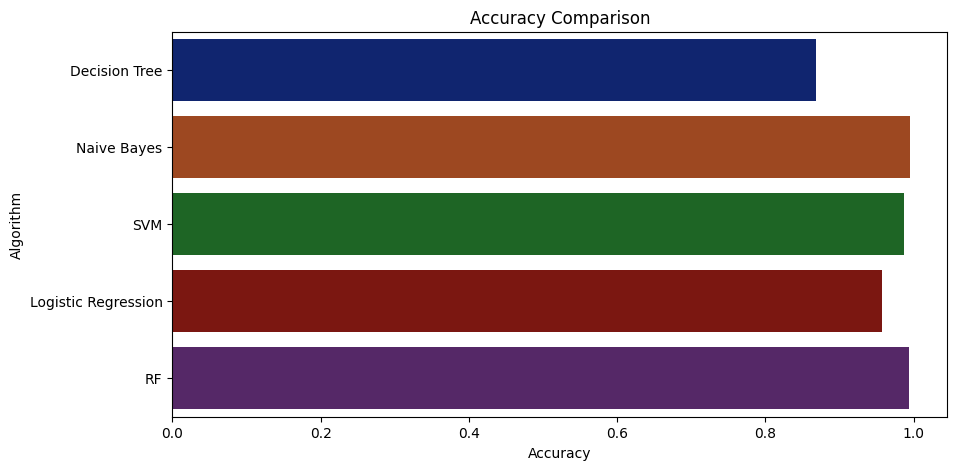

In [22]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [23]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.8681818181818182
Naive Bayes --> 0.9954545454545455
SVM --> 0.9863636363636363
Logistic Regression --> 0.9575757575757575
RF --> 0.9939393939393939


In [24]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [25]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']
